In [6]:
%matplotlib inline
import numpy as np
import math, random
import matplotlib.pyplot as plt


###definition of landmark###

class Landmark:
    def __init__(self,x,y):
        self.position = np.array([x,y])
        
    def __str__(self):
        return "(%f,%f)" % (self.position[0],self.position[1]) 
    
    def getX(self):
        return self.position[0]
    
    def getY(self):
        return self.position[1]
    
    actual_landmarks = (Landmark(-0.5,0),Landmark(0.5,0),Landmark(0,0.5))

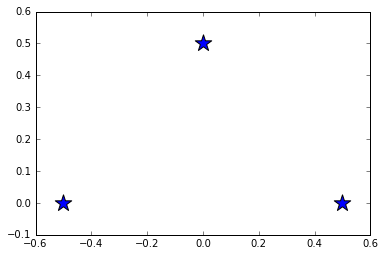

In [8]:
lxs = [e.getX() for e in actual_landmarks]
lys = [e.getY() for e in actual_landmarks]
plt.scatter(lxs,lys,s=300,marker="*")

In [92]:
class Particle:
    def __init__(self,x,y,t,w):
        self.x = x
        self.y = y
        self.t = t
        self.w = w

class ParticleFilter:
    def __init__(self,num):
        self.particles = []
        for i in range(num):
            self.particles.append(Particle(0.0,0.0,0.0,1.0/num))
            
    def moveParticles(self,fw,rot):
        for p in self.particles:
            noise_fw = random.gauss(fw,fw/10)    #10% noise
            noise_rot = random.gauss(rot,rot/10) #10% noise      
            p.x = p.x + noise_fw * math.cos(p.t)
            p.y = p.y + noise_fw * math.sin(p.t)
            p.t = p.t + noise_rot
            
    def draw(self):
        xs = [p.x for p in self.particles]
        ys = [p.y for p in self.particles]
        plt.scatter(xs,ys)
                

In [93]:
class Robot:
    def __init__(self,x,y,rad):
        self.actual_poses = [np.array([x,y,rad])]
        self.guess_poses = [np.array([x,y,rad])]
        random.seed()
        
        self.pf = ParticleFilter(30)
        
    def getX(self):             return self.actual_poses[-1][0]
    def getY(self):             return self.actual_poses[-1][1]
    def getTheta(self):     return self.actual_poses[-1][2]
    
    def getActualXs(self):           return [e[0] for e in self.actual_poses]
    def getActualYs(self):           return [e[1] for e in self.actual_poses]
    def getActualThetas(self):   return [e[2] for e in self.actual_poses]
    def getActualDXs(self):           return [math.cos(e[2]) for e in self.actual_poses]
    def getActualDYs(self):           return [math.sin(e[2]) for e in self.actual_poses]
    
    def getGuessXs(self):           return [e[0] for e in self.guess_poses]
    def getGuessYs(self):           return [e[1] for e in self.guess_poses]
    def getGuessThetas(self):   return [e[2] for e in self.guess_poses]
    def getGuessDXs(self):   return [math.cos(e[2]) for e in self.guess_poses]
    def getGuessDYs(self):   return [math.sin(e[2]) for e in self.guess_poses]
    
    def move(self,fw,rot):
        actual_fw = random.gauss(fw,fw/10)    #10% noise
        actual_rot = random.gauss(rot,rot/10) #10% noise
        
        p = self.actual_poses[-1]
        px, py, pt = p[0],p[1],p[2]
        x = px + actual_fw * math.cos(pt)
        y = py + actual_fw * math.sin(pt)
        t = pt + actual_rot
        self.actual_poses.append(np.array([x,y,t]))
        
        self.pf.moveParticles(fw,rot)

In [102]:
def draw(i=0):
    fig = plt.figure(i,figsize=(8, 8))
    sp = fig.add_subplot(111, aspect='equal')
    sp.set_xlim(-1,1)
    sp.set_ylim(-0.5,1.5)

    plt.scatter(lxs,lys,s=300,marker="*",label="landmarks",color="orange")
    plt.quiver(robot.getActualXs(),robot.getActualYs(),robot.getActualDXs(),robot.getActualDYs(),
           color="red",label="actual robot motion")

    robot.pf.draw()
    plt.legend()

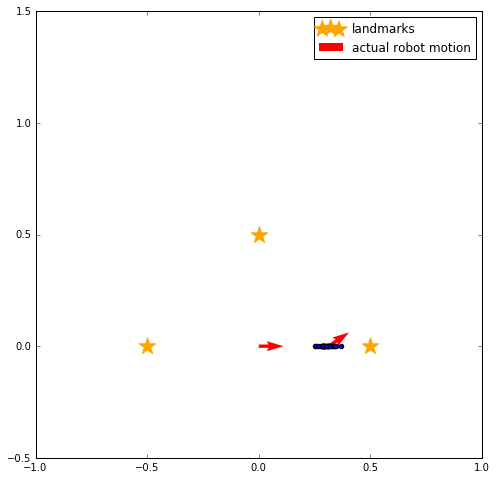

In [107]:
robot = Robot(0,0,0)

robot.move(0.3,3.14/6)
draw(0)

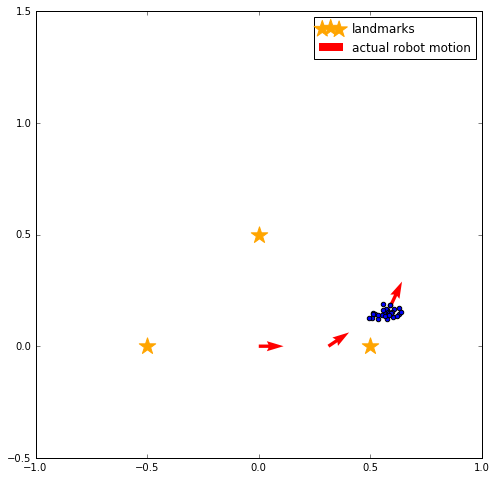

In [108]:
robot.move(0.3,3.14/6)
draw(0)

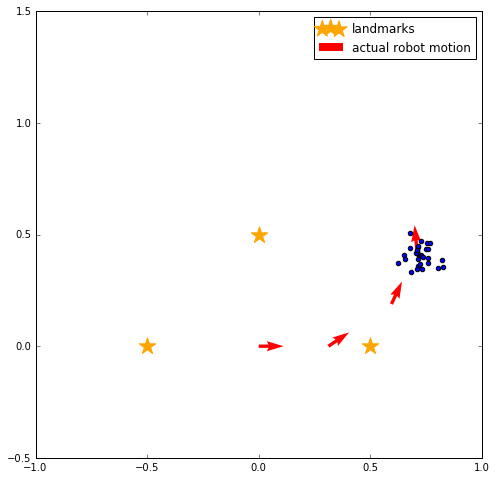

In [109]:
robot.move(0.3,3.14/6)
draw(0)

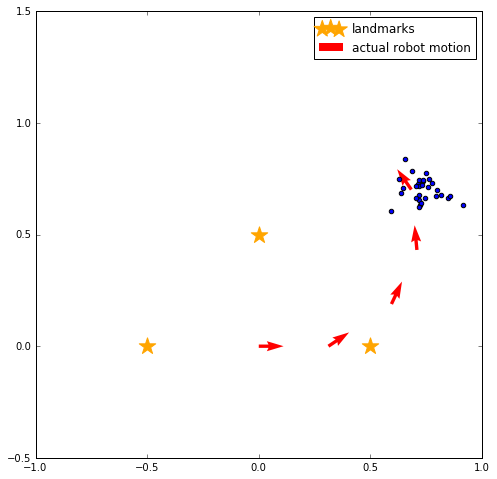

In [110]:
robot.move(0.3,3.14/6)
draw(0)

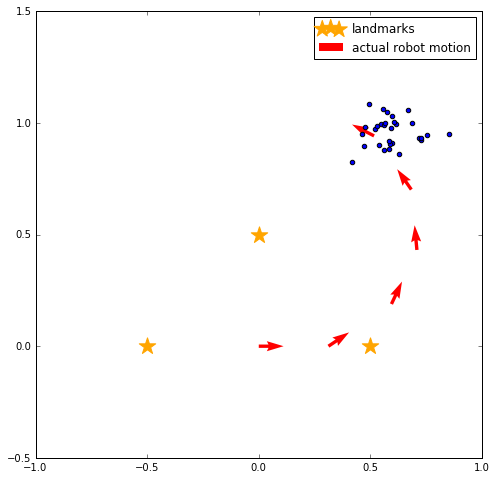

In [111]:
robot.move(0.3,3.14/6)
draw(0)

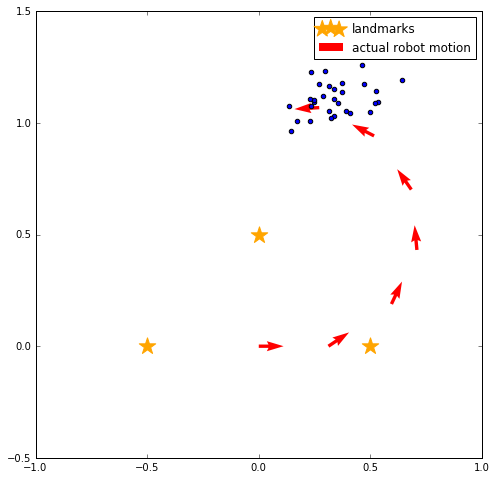

In [112]:
robot.move(0.3,3.14/6)
draw(0)

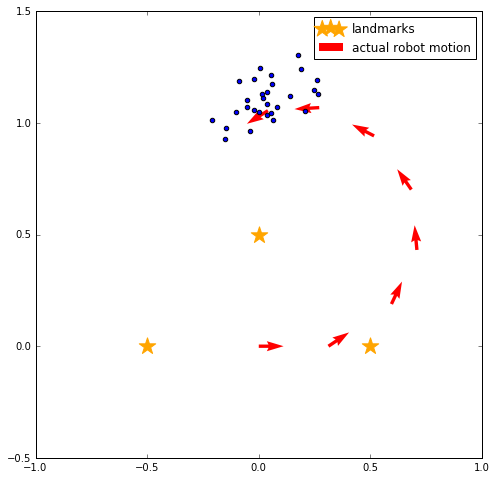

In [113]:
robot.move(0.3,3.14/6)
draw(0)

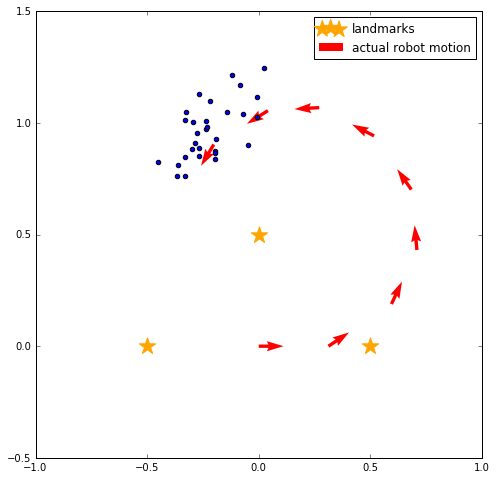

In [114]:
robot.move(0.3,3.14/6)
draw(0)

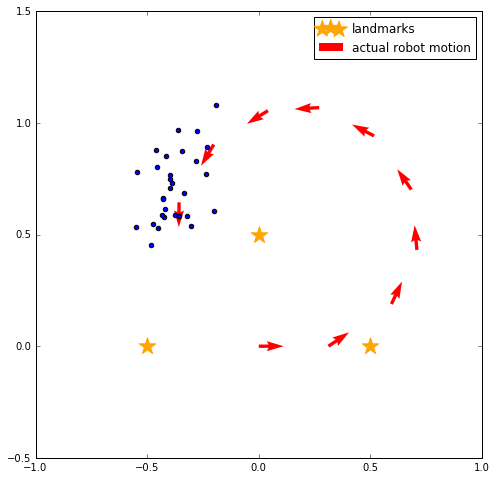

In [115]:
robot.move(0.3,3.14/6)
draw(0)

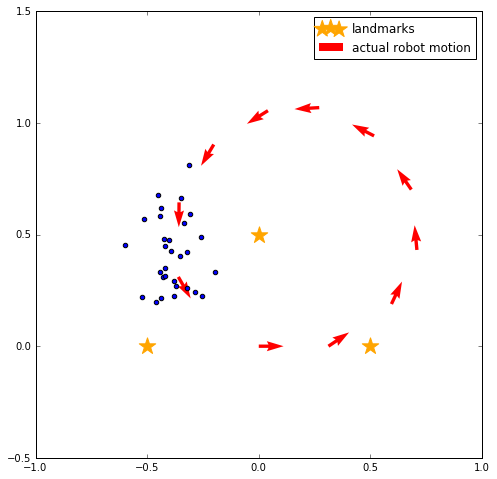

In [116]:
robot.move(0.3,3.14/6)
draw(0)